# Task 3

In [2]:
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt

def display_img(img):
    new_img = cv.cvtColor(img, cv.COLOR_BGR2RGB)
    plt.imshow(new_img)
    plt.show()

def displayImages(img1,img2):
    fig= plt.figure(figsize=(10,20))
    fig.add_subplot(1, 2, 1)
    plt.imshow(img1, cmap='gray')
    plt.axis('off')
    plt.title("First")
    
    fig.add_subplot(1, 2, 2)
    plt.imshow(img2, cmap='gray')
    plt.axis('off')
    plt.title("Second")
    plt.show()


## Task 3.1

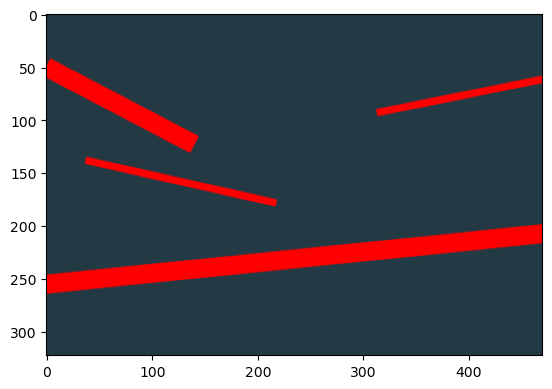

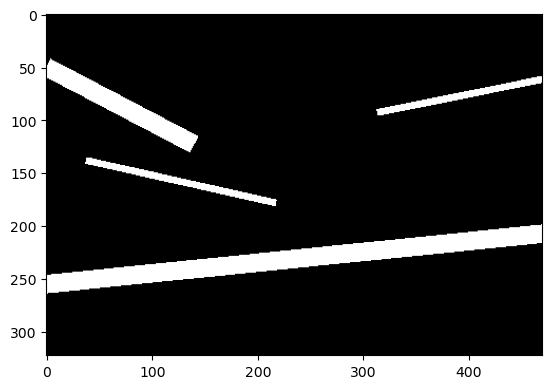

Red line detected! Distance from the bottom border: 91 pixels.


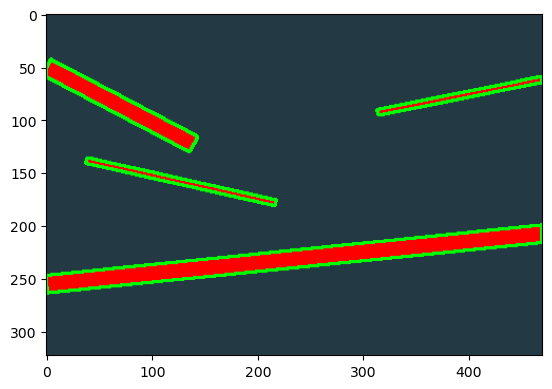

(323, 470, 3)

In [31]:
image = cv.imread('./task-assets/Screenshot 2023-09-03 143627.png')

display_img(image)

hsv_image = cv.cvtColor(image, cv.COLOR_BGR2HSV)
# display_img(hsv_image)
lower_red = np.array([0, 100, 100])
upper_red = np.array([10, 255, 255])
# Create a mask to threshold the image for red color
mask = cv.inRange(hsv_image, lower_red, upper_red)
display_img(mask)

contours, _ = cv.findContours(mask, cv.RETR_EXTERNAL, cv.CHAIN_APPROX_NONE)

# Initialize a variable to store the distance from the bottom border
distance_from_bottom = -1  # Default value if no red line is found

for contour in contours:
    # Get the bounding box of the contour
    # x -> top left corner // y -> top left corner// w -> width of the bounding rectangle // h -> height ....
    x, y, w, h = cv.boundingRect(contour) 

    # Calculate the distance from the bottom border
    distance = image.shape[0] - (2*y+ h)//2     
    
    # Check if this is the closest red line to the bottom
    if distance_from_bottom == -1 or distance < distance_from_bottom:
        distance_from_bottom = distance

# Check if a red line was found
if distance_from_bottom != -1:
    print(f"Red line detected! Distance from the bottom border: {distance_from_bottom} pixels.")
else:
    print("No red line detected in the image.")

cv.drawContours(image, contours, -1, (0, 255, 0), 2)
display_img(image)

image.shape

In [16]:
import tkinter as tk
from tkinter import colorchooser

def pick_color():
    color = colorchooser.askcolor(title="Pick a Color")
    if color[1]:  # Check if a color was chosen
        selected_color_label.config(bg=color[1])
        selected_color_label.config(text=color[1])

# Create the main application window
app = tk.Tk()
app.title("Color Picker")

# Create a label to display the selected color
selected_color_label = tk.Label(app, text="Selected Color", padx=20, pady=10)
selected_color_label.pack()

# Create a button to open the color picker dialog
pick_color_button = tk.Button(app, text="Pick a Color", command=pick_color)
pick_color_button.pack()

# Run the application
app.mainloop()


## Task 3.2

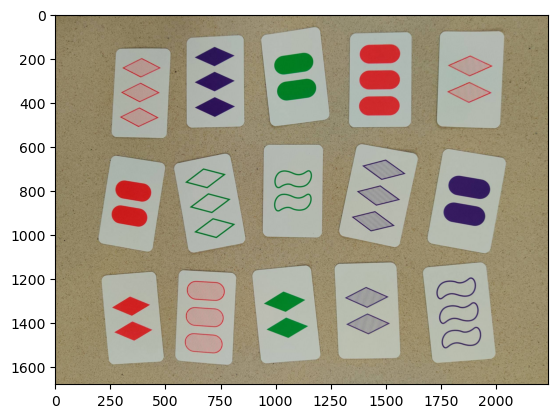

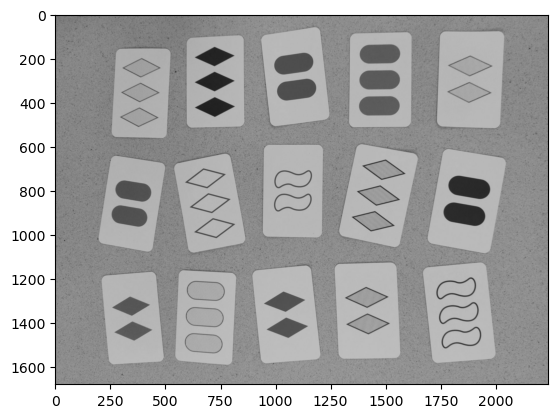

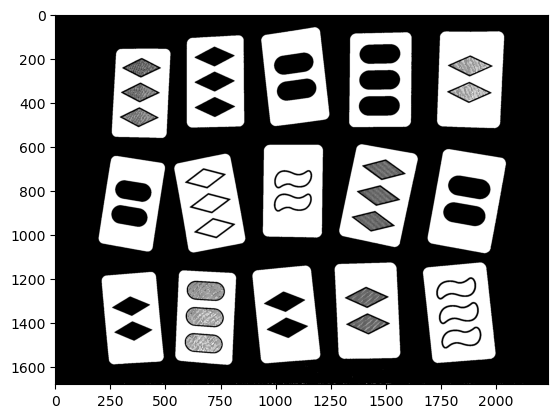

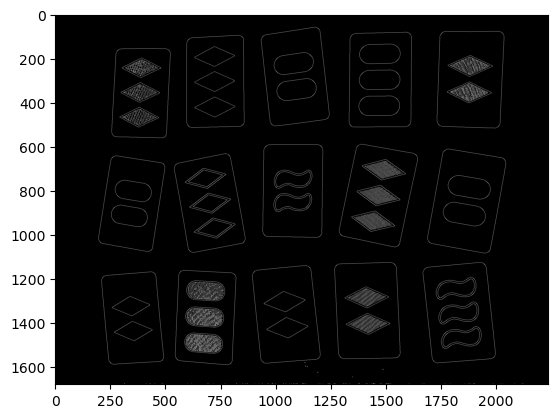

(array([[[2084, 1677]],

       [[2085, 1677]]], dtype=int32), array([[[2029, 1677]],

       [[2030, 1677]]], dtype=int32), array([[[2019, 1677]],

       [[2020, 1677]]], dtype=int32), array([[[1988, 1677]]], dtype=int32), array([[[1872, 1677]],

       [[1873, 1677]]], dtype=int32), array([[[1856, 1677]],

       [[1857, 1677]]], dtype=int32), array([[[1793, 1677]],

       [[1794, 1677]]], dtype=int32), array([[[1768, 1677]]], dtype=int32), array([[[1675, 1677]],

       [[1676, 1677]]], dtype=int32), array([[[1669, 1677]]], dtype=int32), array([[[1606, 1677]],

       [[1607, 1677]],

       [[1608, 1677]],

       [[1607, 1677]]], dtype=int32), array([[[1523, 1677]],

       [[1524, 1677]]], dtype=int32), array([[[1519, 1677]],

       [[1520, 1677]]], dtype=int32), array([[[1514, 1677]],

       [[1515, 1677]],

       [[1516, 1677]],

       [[1515, 1677]]], dtype=int32), array([[[1501, 1677]]], dtype=int32), array([[[1481, 1677]]], dtype=int32), array([[[1474, 1677]],

       

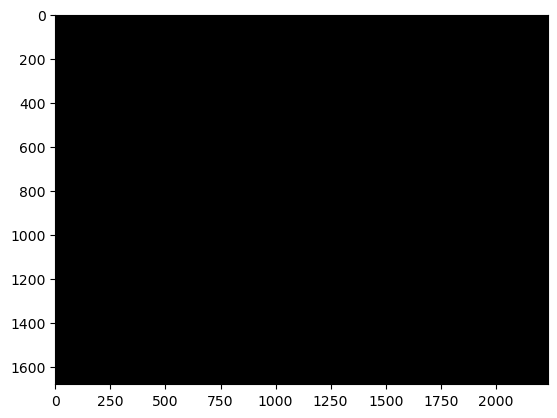

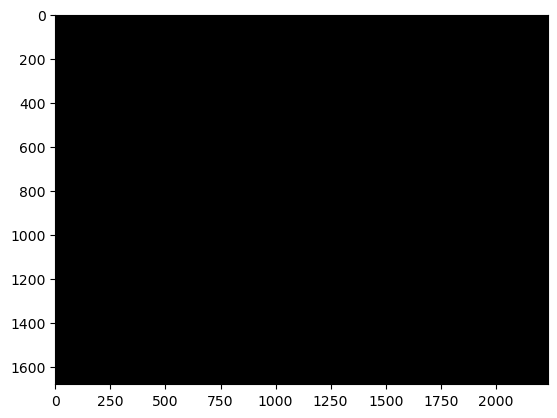

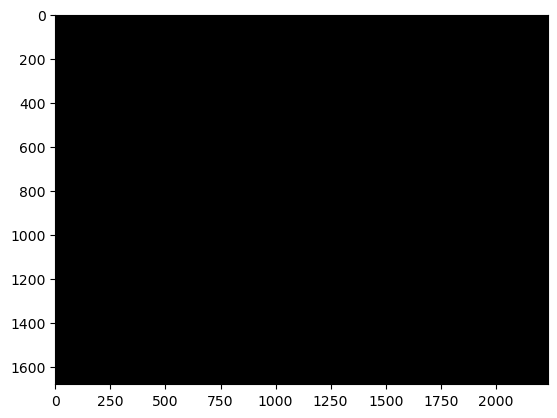

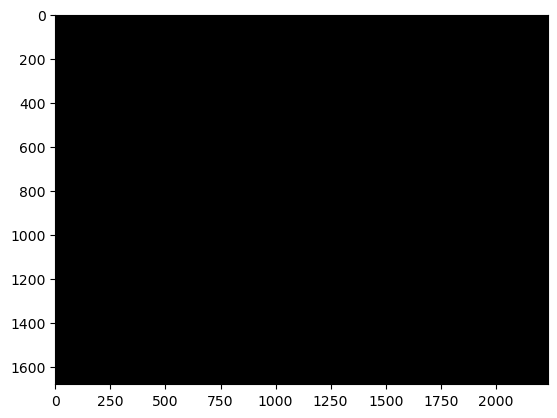

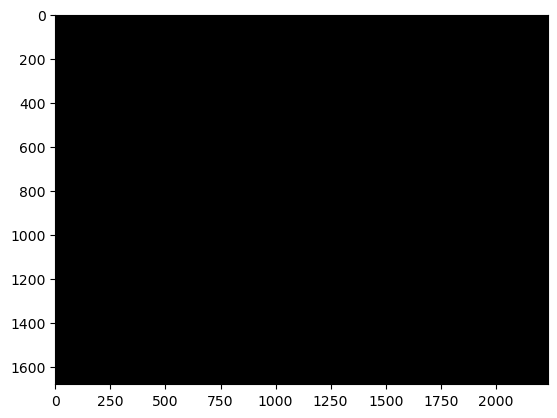

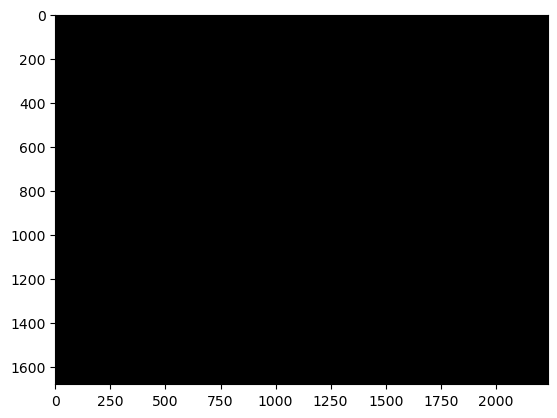

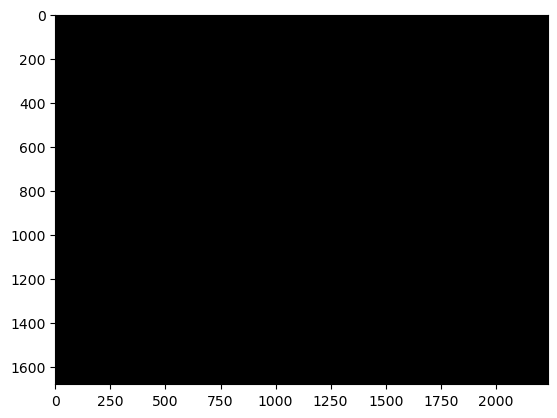

KeyboardInterrupt: 

In [30]:
# what is wrongggggggggggggggggggggggggggggggggggggggggggggggggggggggggggggggggggggggggggggggggggggggggggggggggggggggggggggggggggggg!!
img = cv.imread('./task-assets/Ttpvb.jpg')
display_img(img)
img=cv.GaussianBlur(img,(3,3), 100)
gray = cv.cvtColor(img, cv.COLOR_BGR2GRAY)
display_img(gray)

_, thresh = cv.threshold(gray, 161, 255, cv.THRESH_BINARY)
display_img(thresh)

# canny = cv.Canny(thresh, 160, 255)
# display_img(canny)
contours, _ = cv.findContours(thresh, cv.RETR_EXTERNAL, cv.CHAIN_APPROX_NONE)

print(contours)
for contour in contours:
    mask = np.zeros(img.shape[:2], np.uint8)
    cv.drawContours(mask, [contour],-1, (0,255,0), 2)
    # Show mask
    plt.imshow(mask, cmap='gray')
    plt.show()
    masked = cv.bitwise_and(img, img, mask=mask)
    # Show image
    plt.imshow(masked)
    plt.show()
# display_img(image_copy5)